In [1]:
import pandas as pd
import numpy as np
import os
import warnings
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 

warnings.filterwarnings("ignore", module="some_module")

from joblib import dump, load

In [2]:
#loading dataset
df=pd.read_csv('/Users/mac/Desktop/banking/data/final_dataset')

### Dataset Splitting

In [3]:
# dropping the target feature
X = df.drop('target', axis=1)
# naming the target feature
y = df['target']

In [4]:
cat_attr = X.select_dtypes(include=['object']).columns
# Identify numerical attributes
num_attr = X.select_dtypes(include=['int64', 'float64']).columns

In [5]:
# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, random_state=42, stratify= y)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58456, 21), (14614, 21), (58456,), (14614,))

In [7]:
#creating pipelines for categorical feature
cat_pipeline = Pipeline([ ('imputer', SimpleImputer(strategy="most_frequent")),
                         ('encoder', OneHotEncoder(handle_unknown="ignore"))])

In [8]:
#creating pipelines for numerical feature
num_pipeline= Pipeline([('imputer', SimpleImputer()),('scaler', StandardScaler())])

In [9]:
# full pipeline using column transformer
full_pipeline = ColumnTransformer([('num_pipe', num_pipeline, num_attr),('cat_pipe', cat_pipeline, cat_attr)])

### Modeling

In [10]:
models_trained= []
# instantiating the model
DTC=DecisionTreeClassifier() 

DTC = Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", DecisionTreeClassifier(random_state=123, max_depth=6, min_samples_leaf=8))
])

In [11]:
# Fitting the model
DTC.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Unnamed: 0', 'Age', 'Call_Duration_Seconds',
       'Contacts_During_Campaign', 'Days_Since_Last_Contact',
       'Previous_Contacts', 'Employment_Variation_Rate',
       'Consumer_Price_Index', 'Consumer_Confidence_Index', 'E...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Job', 'Marital_Status', 'Education_Level', 'Has_Default',
       'Has_Housing_Loan', 'Has_Personal_Loan', 'Contact_Type',
       'Contact_Month', 'Contact_Day', 'Previous_Outcome'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=8,
                                        random_state=123))])

In [12]:
# making prediction
model_1= DTC.predict(X_test)

In [13]:
# print  classification report
print(classification_report(model_1,y_test))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6424
           1       0.95      0.85      0.89      8190

    accuracy                           0.89     14614
   macro avg       0.89      0.89      0.89     14614
weighted avg       0.89      0.89      0.89     14614



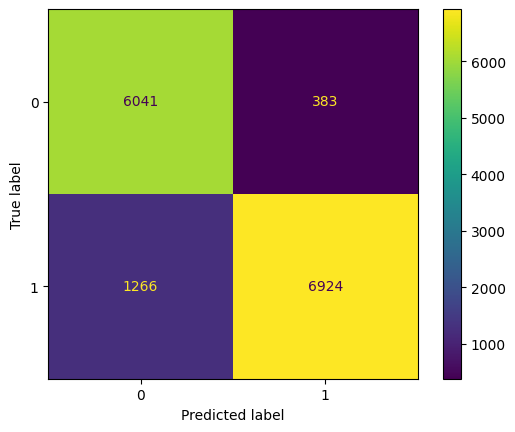

In [14]:
# viewing confusion matrix display
ConfusionMatrixDisplay.from_predictions(model_1,y_test);

In [15]:
# appending the model into the empty list
models_trained.append(DTC)

In [16]:
# instantiating the model
LRP=LogisticRegression()

LRP = Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model",LogisticRegression(random_state=42))
])

In [17]:
# fitting the model
LRP.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Unnamed: 0', 'Age', 'Call_Duration_Seconds',
       'Contacts_During_Campaign', 'Days_Since_Last_Contact',
       'Previous_Contacts', 'Employment_Variation_Rate',
       'Consumer_Price_Index', 'Consumer_Confidence_Index', 'E...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Job', 'Marital_Status', 'Education_Level', 'Has_Default',
       'Has_Housing_Loan', 'Has_Personal_Loan', 'Contact_Type',
       'Contact_Month', 'Contact_Day', 'Previous_Outcome'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model', LogisticRegression(random_state=42))])

In [18]:
# making prediction
model_2= LRP.predict(X_test)

In [19]:
# printing classification report
print(classification_report(model_2, y_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7099
           1       0.89      0.86      0.87      7515

    accuracy                           0.87     14614
   macro avg       0.87      0.87      0.87     14614
weighted avg       0.87      0.87      0.87     14614



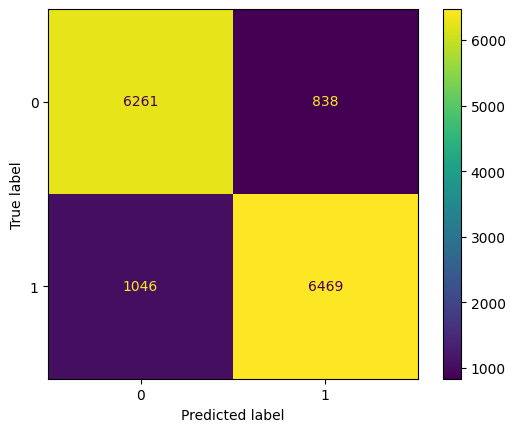

In [20]:
ConfusionMatrixDisplay.from_predictions(model_2, y_test);

In [21]:
models_trained.append(LRP)

In [22]:
#instantiating
RFC=RandomForestClassifier()

RFC= Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model",RandomForestClassifier(random_state=42, max_depth=6, min_samples_leaf=8))
])

In [23]:
RFC.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Unnamed: 0', 'Age', 'Call_Duration_Seconds',
       'Contacts_During_Campaign', 'Days_Since_Last_Contact',
       'Previous_Contacts', 'Employment_Variation_Rate',
       'Consumer_Price_Index', 'Consumer_Confidence_Index', 'E...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Job', 'Marital_Status', 'Education_Level', 'Has_Default',
       'Has_Housing_Loan', 'Has_Personal_Loan', 'Contact_Type',
       'Contact_Month', 'Contact_Day', 'Previous_Outcome'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 RandomForestClassifier(max_depth=6, min_samples_leaf=8,
                                        random_state=42))])

In [24]:
model_3= RFC.predict(X_test)

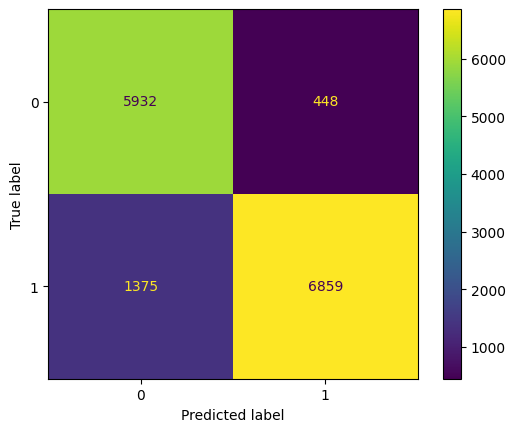

In [25]:
ConfusionMatrixDisplay.from_predictions(model_3,y_test);

In [26]:
Ada=AdaBoostClassifier()

Ada = Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model",AdaBoostClassifier(random_state=42))
])

In [27]:
Ada.fit(X_train,y_train)

//anaconda3/envs/env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Unnamed: 0', 'Age', 'Call_Duration_Seconds',
       'Contacts_During_Campaign', 'Days_Since_Last_Contact',
       'Previous_Contacts', 'Employment_Variation_Rate',
       'Consumer_Price_Index', 'Consumer_Confidence_Index', 'E...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Job', 'Marital_Status', 'Education_Level', 'Has_Default',
       'Has_Housing_Loan', 'Has_Personal_Loan', 'Contact_Type',
       'Contact_Month', 'Contact_Day', 'Previous_Outcome'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model', AdaBoostClassifier(random_state=42))])

In [28]:
model_4 = Ada.predict(X_test)

In [29]:
print(classification_report(model_4, y_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7158
           1       0.88      0.87      0.87      7456

    accuracy                           0.87     14614
   macro avg       0.87      0.87      0.87     14614
weighted avg       0.87      0.87      0.87     14614



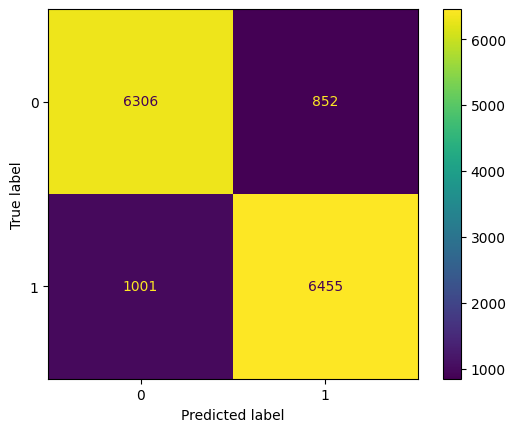

In [30]:
ConfusionMatrixDisplay.from_predictions(model_4, y_test);

In [31]:
models_trained.append(Ada)

In [32]:
# creating a list
pipelines = [DTC, LRP,RFC,Ada]
res = []  # creating an empty list

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    model_name = pipe.named_steps['model'].__class__.__name__# calling model name
    accuracy_score_value = accuracy_score(y_test, pipe.predict(X_test))# setting the accuracy score
    result = {'model': model_name, 'metric(accuracy_score)': accuracy_score_value}  
    res.append(result)
results = pd.DataFrame(res)
results = results.sort_values(by='metric(accuracy_score)', ascending=False)
results

//anaconda3/envs/env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,model,metric(accuracy_score)
0,DecisionTreeClassifier,0.887163
2,RandomForestClassifier,0.875257
3,AdaBoostClassifier,0.873204
1,LogisticRegression,0.871083


### Hyperparameter tuning

In [33]:
# Define the pipeline with Decision Tree Classifier
DTC_hy = Pipeline([
    ("col_trans", full_pipeline),  # Preprocessing
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),  # Feature selection
    ("model", DecisionTreeClassifier(random_state=123))  # Decision Tree Classifier
])

# Define the hyperparameter grid for Decision Tree
param_grid_dtc = {
    "model__max_depth": [5, 10, 20, None],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__criterion": ['gini', 'entropy']  # Splitting criterion
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search_dtc = GridSearchCV(estimator=DTC, param_grid=param_grid_dtc, scoring='accuracy', cv=5)
grid_search_dtc.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params_dtc = grid_search_dtc.best_params_
best_model_dtc = grid_search_dtc.best_estimator_

# Predict on the test set using the best Decision Tree model
y_pred = best_model_dtc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params_dtc}")
print(f"Accuracy: {accuracy}")

Best Parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Accuracy: 0.9635281237169837


In [34]:
# fitting best model
DTC_hy.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Unnamed: 0', 'Age', 'Call_Duration_Seconds',
       'Contacts_During_Campaign', 'Days_Since_Last_Contact',
       'Previous_Contacts', 'Employment_Variation_Rate',
       'Consumer_Price_Index', 'Consumer_Confidence_Index', 'E...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Job', 'Marital_Status', 'Education_Level', 'Has_Default',
       'Has_Housing_Loan', 'Has_Personal_Loan', 'Contact_Type',
       'Contact_Month', 'Contact_Day', 'Previous_Outcome'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model', DecisionTreeClassifier(random_state=123))])

In [35]:
#making prediction
final_model= DTC_hy.predict(X_test)

In [36]:
print(classification_report(final_model, y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      6820
           1       1.00      0.93      0.96      7794

    accuracy                           0.96     14614
   macro avg       0.96      0.97      0.96     14614
weighted avg       0.97      0.96      0.96     14614



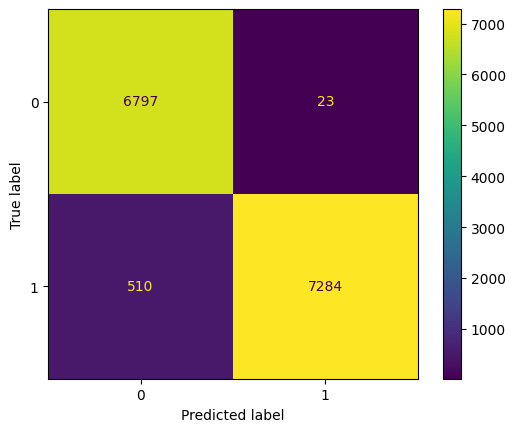

In [37]:
ConfusionMatrixDisplay.from_predictions(final_model,y_test);

In [38]:
## exporting best model
#dump(DTC_hy, "DTC.joblib")